In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data=pd.read_csv("/content/framingham_heart_disease.csv")

In [ ]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
data.shape
data.drop(columns=['education'],inplace=True)

In [ ]:
data.head(2)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0


In [ ]:
df=data
type(data)
data.dtypes

male                 int64
age                  int64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [ ]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [male, age, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []


In [ ]:
corr_matrix=df.corr()

In [ ]:
import seaborn as sns
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise 

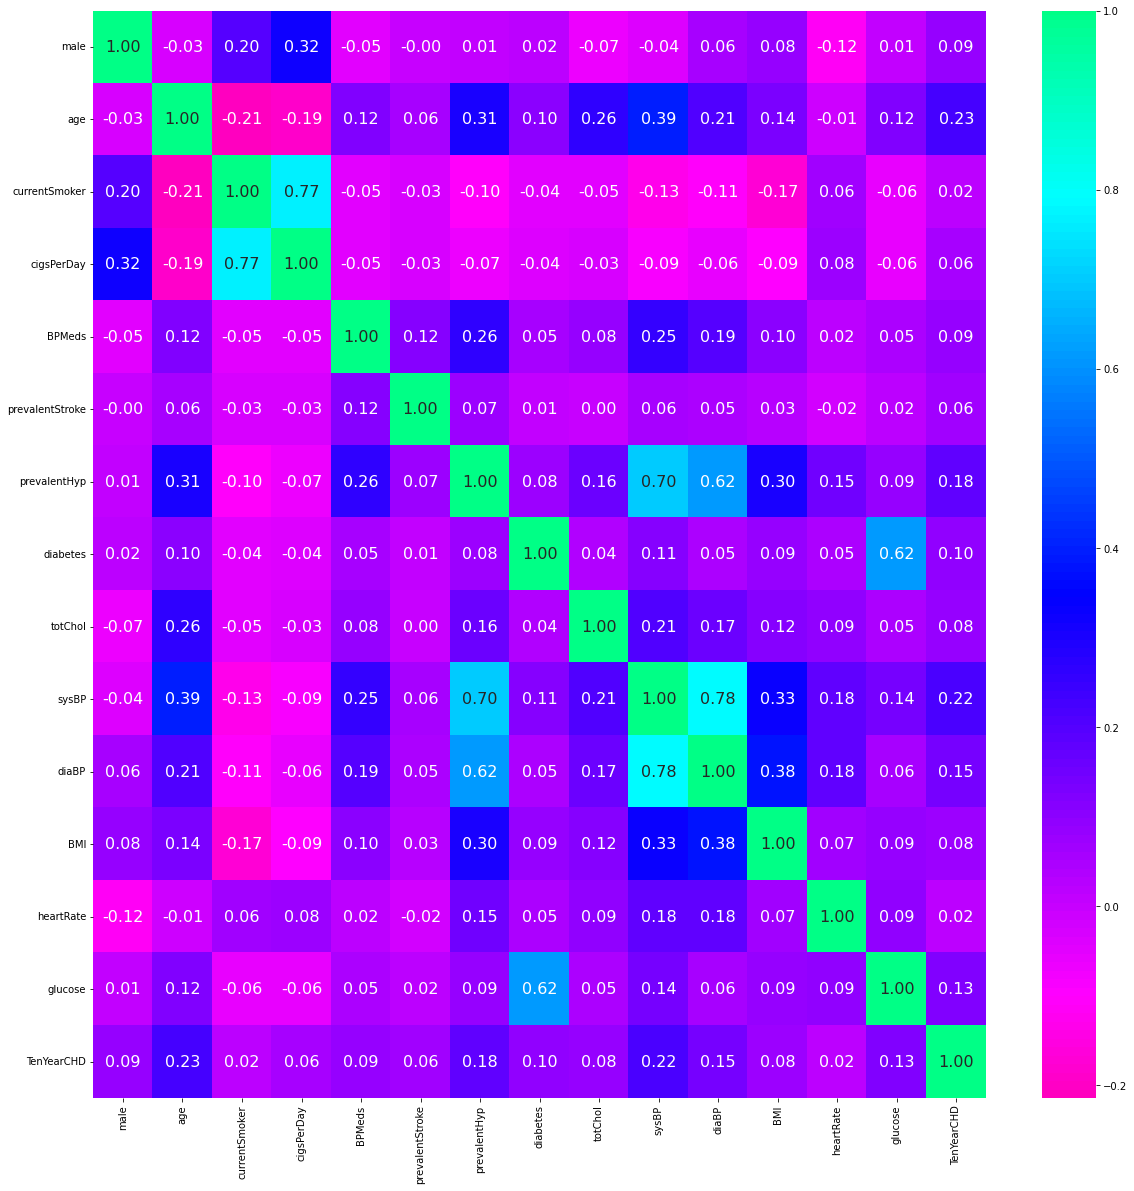

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix,annot=True,fmt="0.2f",center=True,cbar=True,annot_kws={'fontsize':16},cmap="gist_rainbow_r")
plt.plot()
plt.show()

<H1>**FEATURE SELECTION**</H1>

---



---



<h3>--> using correlation</h3>

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

correlation(df,0.7)


# works only on numerical data not on categorical one.

{'cigsPerDay', 'diaBP'}

In [ ]:
# corr_matrix.columns
# for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             print(corr_matrix.iloc[i, j],end='')
#         print("\n")

In [ ]:
df.drop(columns=['cigsPerDay','diaBP'],inplace=True)

In [ ]:
df.isna().sum()
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

male               0
age                0
currentSmoker      0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

---><h3>**using chi2**<h3>
          -- SelectKBest

          

In [ ]:
df.shape
print(df.iloc[:,0:12])

      male  age  currentSmoker  BPMeds  prevalentStroke  prevalentHyp  \
0        1   39              0     0.0                0             0   
1        0   46              0     0.0                0             0   
2        1   48              1     0.0                0             0   
3        0   61              1     0.0                0             1   
4        0   46              1     0.0                0             0   
...    ...  ...            ...     ...              ...           ...   
4231     1   58              0     0.0                0             1   
4232     1   68              0     0.0                0             1   
4233     1   50              1     0.0                0             1   
4234     1   51              1     0.0                0             0   
4237     0   52              0     0.0                0             0   

      diabetes  totChol  sysBP    BMI  heartRate  glucose  
0            0    195.0  106.0  26.97       80.0     77.0  
1  

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# separate independent & dependent variables
X = df.iloc[:,0:12]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range

# # apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
cols=pd.DataFrame(X.columns[fit.get_support()])
k=pd.concat([dfscores,cols],axis=1)
k.columns=['Fscore','features']
print(k.sort_values(by='Fscore',ascending=False))
dfscores = pd.DataFrame
print(X.columns[fit.get_support()])
print(type(fit))
print(fit.pvalues_)

print("*********************************************")
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X.columns)

# #concat two dataframes for better visualization 
# featureScores = pd.concat([dfcolumns,dfscores],axis=1)
# print(featureScores)


        Fscore         features
8   672.021170              BMI
11  395.904976              NaN
1   296.231517              age
7   246.873636            sysBP
5    83.212654         diabetes
6    31.906320          totChol
3    26.294475  prevalentStroke
0    19.090517             male
9    18.157831          glucose
4     8.528990     prevalentHyp
10    3.794397              NaN
2     0.785866           BPMeds
Index(['male', 'age', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
       'totChol', 'sysBP', 'BMI', 'glucose'],
      dtype='object')
<class 'sklearn.feature_selection._univariate_selection.SelectKBest'>
[1.24662760e-005 2.18179547e-066 3.75352985e-001 2.93126075e-007
 3.49533524e-003 7.36845185e-020 1.61789918e-008 1.24747568e-055
 3.63129741e-148 2.03331579e-005 5.14243986e-002 4.28924919e-088]
*********************************************


In [ ]:
df=df[['male', 'age', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
       'totChol', 'sysBP', 'BMI', 'glucose','TenYearCHD']]

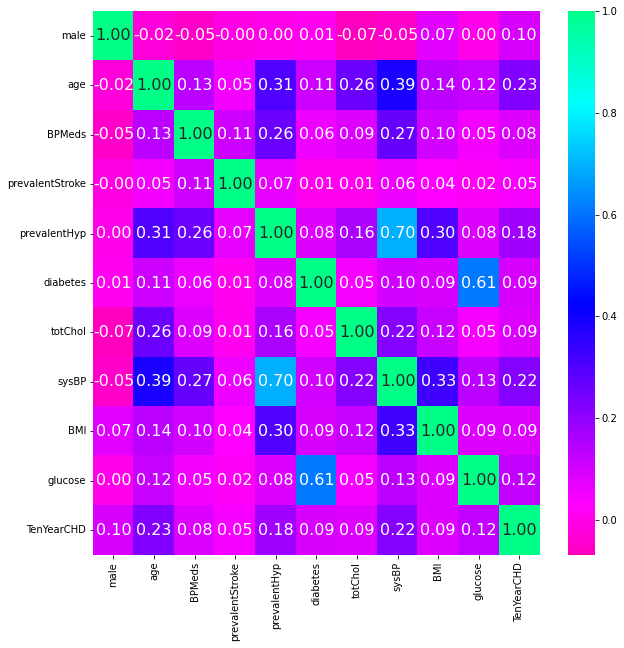

In [ ]:
import seaborn as sns

corr_matrix=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,fmt="0.2f",center=True,cbar=True,annot_kws={'fontsize':16},cmap="gist_rainbow_r")
plt.plot()
plt.show()

<h1>**Outliers detection**

In [ ]:
df.describe()

,male,age,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,glucose,TenYearCHD
count,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000
mean,0.445416,49.575782,0.030207,0.005564,0.311341,0.027027,237.014838,132.364600,25.812022,81.906465,0.152093
std,0.497078,8.557779,0.171178,0.074397,0.463103,0.162184,44.651097,22.025542,4.064649,23.842813,0.359159
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,15.540000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,23.090000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,25.410000,78.000000,0.000000
75%,1.000000,56.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,28.060000,87.000000,0.000000
max,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,56.800000,394.000000,1.000000


In [ ]:
df.columns

Index(['male', 'age', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
       'totChol', 'sysBP', 'BMI', 'glucose', 'TenYearCHD'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

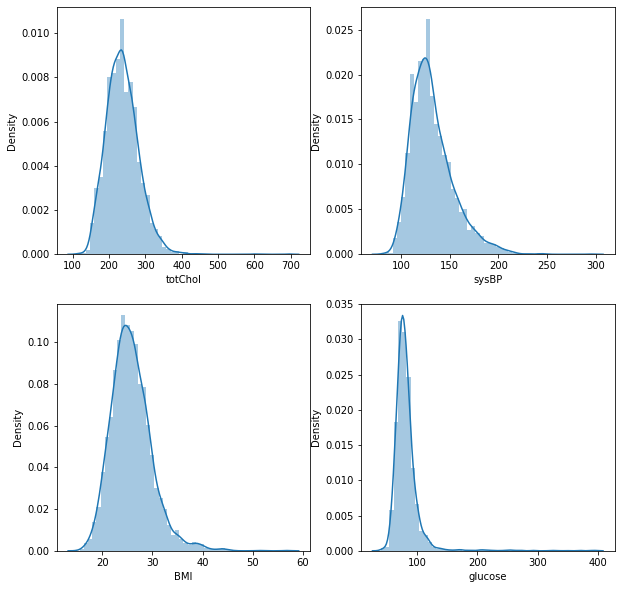

In [ ]:
from matplotlib import figure
fig=plt.figure(figsize=(10,10))

feat= ['totChol', 'sysBP', 'BMI', 'glucose']

for i in range(len(feat)):
  plt.subplot(2,2,i+1)
  sns.distplot(df[feat[i]])


In [ ]:
feat= ['totChol', 'sysBP', 'BMI', 'glucose']
f=['z_totChol', 'z_sysBP', 'z_BMI', 'z_glucose']

Std=[]
for i in range(len(feat)):
  Std.append(df[feat[i]].std())
# Std=[df[]]

for i in range(len(feat)):
  df[f[i]]=(df[feat[i]]-df[feat[i]].mean())/df[feat[i]].std()

  print(" Outliers -> {}".format(feat[i]),"\n")

  print( df[ (df[f[i]]>3) | (df[f[i]]<-3) ][f[i]].count())
  print("*********************")

 Outliers -> totChol 

22
*********************
 Outliers -> sysBP 

44
*********************
 Outliers -> BMI 

53
*********************
 Outliers -> glucose 

49
*********************


In [ ]:
df.shape


(3774, 15)

In [ ]:
f=['z_totChol', 'z_sysBP', 'z_BMI', 'z_glucose']
new_df=df[ (df[f[0]]<3) & (df[f[0]]>-3) &(df[f[1]]<3) & (df[f[1]]>-3)&(df[f[2]]<3) & (df[f[2]]>-3) & (df[f[3]]<3) & (df[f[3]]>-3)]
# for i in range(len(feat)):
#   print(" Outliers -> {}".format(feat[i]),"\n")
#   new_df=df[ (df[f[i]]<3) & (df[f[i]]>-3)]

# new_df.head()
new_df.shape

(3620, 17)

In [ ]:
3774-3620
# 154 outiers rows has been removed

154

In [ ]:
df.describe()

,male,age,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,glucose,TenYearCHD,z_totChol,z_sysBP,z_BMI,z_glucose
count,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3774.000000,3.774000e+03,3.774000e+03,3.774000e+03,3.774000e+03
mean,0.445416,49.575782,0.030207,0.005564,0.311341,0.027027,237.014838,132.364600,25.812022,81.906465,0.152093,2.668771e-16,-1.110811e-16,8.509945e-16,2.108659e-16
std,0.497078,8.557779,0.171178,0.074397,0.463103,0.162184,44.651097,22.025542,4.064649,23.842813,0.359159,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,15.540000,40.000000,0.000000,-2.777420e+00,-2.218542e+00,-2.527161e+00,-1.757614e+00
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,23.090000,71.000000,0.000000,-6.946042e-01,-6.975810e-01,-6.696818e-01,-4.574320e-01
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,25.410000,78.000000,0.000000,-6.751992e-02,-1.981608e-01,-9.890687e-02,-1.638425e-01
75%,1.000000,56.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,28.060000,87.000000,0.000000,6.043561e-01,5.282685e-01,5.530559e-01,2.136298e-01
max,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,56.800000,394.000000,1.000000,1.027937e+01,7.383945e+00,7.623777e+00,1.308963e+01


In [ ]:
new_df.describe()

,male,age,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,glucose,TenYearCHD,z_totChol,z_sysBP,z_BMI,z_glucose
count,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000,3620.000000
mean,0.451381,49.359669,0.026243,0.004972,0.293646,0.012983,235.528177,130.909254,25.569555,79.724586,0.141160,-0.033295,-0.066075,-0.059652,-0.091511
std,0.497699,8.514275,0.159880,0.070349,0.455495,0.113218,41.888522,19.868787,3.633703,13.420757,0.348235,0.938130,0.902079,0.893977,0.562885
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,15.540000,40.000000,0.000000,-2.777420,-2.218542,-2.527161,-1.757614
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,205.000000,116.000000,23.060000,71.000000,0.000000,-0.717000,-0.742983,-0.677063,-0.457432
50%,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,233.000000,128.000000,25.330000,78.000000,0.000000,-0.089916,-0.198161,-0.118589,-0.163842
75%,1.000000,56.000000,0.000000,0.000000,1.000000,0.000000,262.000000,142.000000,27.910000,86.000000,0.000000,0.559564,0.437465,0.516152,0.171688
max,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,370.000000,198.000000,37.580000,150.000000,1.000000,2.978318,2.979967,2.895201,2.855935


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_df=pd.DataFrame(scaler.fit_transform(new_df),columns=new_df.columns)
scaled_df.drop([ 'z_totChol','z_sysBP', 'z_BMI', 'z_glucose'],axis=1,inplace=True)
# scaled_df
print(scaled_df.describe())

              male          age  currentSmoker       BPMeds  prevalentStroke  \
count  3620.000000  3620.000000    3620.000000  3620.000000      3620.000000   
mean      0.451381     0.456833       0.498343     0.026243         0.004972   
std       0.497699     0.224060       0.500066     0.159880         0.070349   
min       0.000000     0.000000       0.000000     0.000000         0.000000   
25%       0.000000     0.263158       0.000000     0.000000         0.000000   
50%       0.000000     0.421053       0.000000     0.000000         0.000000   
75%       1.000000     0.631579       1.000000     0.000000         0.000000   
max       1.000000     1.000000       1.000000     1.000000         1.000000   

       prevalentHyp     diabetes      totChol        sysBP          BMI  \
count   3620.000000  3620.000000  3620.000000  3620.000000  3620.000000   
mean       0.293646     0.012983     0.476763     0.414055     0.455061   
std        0.455495     0.113218     0.162990     0.17

In [ ]:
print(df[df['TenYearCHD']==0].shape)
df[df['TenYearCHD']==1].shape

(3200, 17)


(574, 17)

In [ ]:
3200/574

5.574912891986063

<h1>**Handling Imbalanced Data**

<h3>1. Using KFold and GridSearchCV

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import numpy as np

In [ ]:
y=df['TenYearCHD']
df.drop(columns=['TenYearCHD'],inplace=True)


In [ ]:
x=df

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)

In [ ]:
log=LogisticRegression()
grid={'C':10*np.arange(1,10),'penalty':['l1','l2']}
cv=KFold(n_splits=5)

clf=GridSearchCV(log,grid,cv=cv)
clf.fit(x_train,y_train)

In [ ]:
y_pred=clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.8410596026490066

In [ ]:
confusion_matrix(y_test,y_pred)

array([[628,  12],
       [108,   7]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       640
           1       0.37      0.06      0.10       115

    accuracy                           0.84       755
   macro avg       0.61      0.52      0.51       755
weighted avg       0.78      0.84      0.79       755



In [ ]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001298,0.000187,0.000000,0.000000,10,l1,"{'C': 10, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
1,0.073739,0.006216,0.004018,0.001622,10,l2,"{'C': 10, 'penalty': 'l2'}",0.850993,0.837748,0.864238,0.852649,0.849088,0.850943,0.008452,1
2,0.000716,0.000063,0.000000,0.000000,20,l1,"{'C': 20, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
3,0.070429,0.004723,0.003833,0.000683,20,l2,"{'C': 20, 'penalty': 'l2'}",0.850993,0.839404,0.862583,0.852649,0.849088,0.850943,0.007416,1
4,0.000788,0.000167,0.000000,0.000000,30,l1,"{'C': 30, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
5,0.065140,0.003098,0.003908,0.002045,30,l2,"{'C': 30, 'penalty': 'l2'}",0.850993,0.837748,0.860927,0.852649,0.850746,0.850613,0.007432,4
6,0.000761,0.000100,0.000000,0.000000,40,l1,"{'C': 40, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
7,0.069332,0.001364,0.003047,0.000201,40,l2,"{'C': 40, 'penalty': 'l2'}",0.850993,0.839404,0.862583,0.850993,0.849088,0.850612,0.007369,5
8,0.000800,0.000083,0.000000,0.000000,50,l1,"{'C': 50, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
9,0.072108,0.005298,0.003200,0.000454,50,l2,"{'C': 50, 'penalty': 'l2'}",0.850993,0.839404,0.862583,0.850993,0.847430,0.850281,0.007467,8


In [ ]:
print(clf.best_params_)
print(clf.best_score_)

{'C': 10, 'penalty': 'l2'}
0.8509434065873721


In [ ]:
dir(clf)

In [ ]:
df.columns

Index(['male', 'age', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes',
       'totChol', 'sysBP', 'BMI', 'glucose', 'z_totChol', 'z_sysBP', 'z_BMI',
       'z_glucose'],
      dtype='object')

<h3>2. Using Ensemble Technique

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=rf.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[629,  11],
       [107,   8]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       640
           1       0.42      0.07      0.12       115

    accuracy                           0.84       755
   macro avg       0.64      0.53      0.52       755
weighted avg       0.79      0.84      0.79       755



In [ ]:
# array([[617,   8],
#        [128,   2]])

3.<h3>Under Sampling

In [ ]:
from imblearn.under_sampling import NearMiss
from collections import Counter

In [ ]:
nr=NearMiss(0.8)
x_train_nr,y_train_nr=nr.fit_resample(x_train,y_train)
print("no of classes before fit {}".format(Counter(y_train)))
print("no of classes before fit {}".format(Counter(y_train_nr)))

no of classes before fit Counter({0: 2560, 1: 459})
no of classes before fit Counter({0: 573, 1: 459})


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [ ]:
rf=RandomForestClassifier()
rf.fit(x_train_nr,y_train_nr)
y_pred_nr=rf.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred_nr)

array([[297, 343],
       [ 36,  79]])

In [ ]:
print(classification_report(y_test,y_pred_nr))

              precision    recall  f1-score   support

           0       0.89      0.46      0.61       640
           1       0.19      0.69      0.29       115

    accuracy                           0.50       755
   macro avg       0.54      0.58      0.45       755
weighted avg       0.78      0.50      0.56       755



<h3>Over Sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros=RandomOverSampler(sampling_strategy=0.8)
x_train_ros,y_train_ros=ros.fit_resample(x_train,y_train)
print("no of classes before fit {}".format(Counter(y_train)))
print("no of classes before fit {}".format(Counter(y_train_ros)))

no of classes before fit Counter({0: 2560, 1: 459})
no of classes before fit Counter({0: 2560, 1: 2048})


In [ ]:
rf.fit(x_train_ros,y_train_ros)
y_pred_ros=rf.predict(x_test)

In [ ]:
confusion_matrix(y_test,y_pred_ros)
# array([[295, 345],
#        [ 37,  78]])

array([[612,  28],
       [ 99,  16]])

In [ ]:
print(classification_report(y_test,y_pred_ros))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       640
           1       0.36      0.14      0.20       115

    accuracy                           0.83       755
   macro avg       0.61      0.55      0.55       755
weighted avg       0.79      0.83      0.80       755



<h3>SMOTE

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE

In [ ]:
smt=SMOTETomek(0.8)
x_train_smt,y_train_smt=smt.fit_resample(x_train,y_train)
print(" SMOTETomek no of classes before fit {}".format(Counter(y_train)))
print(" SMOTETomek no of classes before fit {}".format(Counter(y_train_smt)))


sm=SMOTE(0.8)
x_train_sm,y_train_sm=sm.fit_resample(x_train,y_train)
print(" SMOTETomek no of classes before fit {}".format(Counter(y_train)))
print(" SMOTETomek no of classes before fit {}".format(Counter(y_train_sm)))



/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


 SMOTETomek no of classes before fit Counter({0: 2560, 1: 459})
 SMOTETomek no of classes before fit Counter({0: 2526, 1: 2014})
 SMOTETomek no of classes before fit Counter({0: 2560, 1: 459})
 SMOTETomek no of classes before fit Counter({0: 2560, 1: 2048})


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [ ]:
from sklearn.metrics import f1_score
rf.fit(x_train_smt,y_train_smt)
y_pred_smt=rf.predict(x_test)
print(confusion_matrix(y_test,y_pred_smt))
print(classification_report(y_test,y_pred_smt))
print(f1_score(y_test,y_pred_smt))

[[552  88]
 [ 92  23]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       640
           1       0.21      0.20      0.20       115

    accuracy                           0.76       755
   macro avg       0.53      0.53      0.53       755
weighted avg       0.76      0.76      0.76       755

0.20353982300884957


In [ ]:
rf.fit(x_train_sm,y_train_sm)
y_pred_sm=rf.predict(x_test)
print(confusion_matrix(y_test,y_pred_sm))
print(classification_report(y_test,y_pred_sm))

[[557  83]
 [ 97  18]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       640
           1       0.18      0.16      0.17       115

    accuracy                           0.76       755
   macro avg       0.51      0.51      0.51       755
weighted avg       0.75      0.76      0.76       755



<h1>PIPELINE

In [ ]:
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier

In [ ]:
pipeline_lr=Pipeline([('scaler1',StandardScaler()),
              ('pca1',PCA(n_components=2)),
              ('lr_classifier',LogisticRegression())])

In [ ]:
pipeline_dt=Pipeline([('scaler2',StandardScaler()),
              ('pca2',PCA(n_components=2)),
              ('dt_classifier',DecisionTreeClassifier())])

In [ ]:
pipeline_rf=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_classifier',RandomForestClassifier())])

In [ ]:
pipelines=[pipeline_lr,pipeline_dt,pipeline_rf]
classifiers={0:'Logistic Regression',1:'Decision Tree',2:'Random Forest'}

In [ ]:
for pipe in pipelines:
  pipe.fit(x_train,y_train)

In [ ]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [ ]:
for i,model in enumerate(pipelines):
  print("{} Test Accuracy: {}".format(classifiers[i],model.score(x_test,y_test)))
  if model.score(x_test,y_test)>best_accuracy:
    best_accuracy=model.score(x_test,y_test)
    best_pipeline=model
    best_classifier=classifiers[i]
print('Classifier with best accuracy:{}'.format(best_classifier))

Logistic Regression Test Accuracy: 0.8503311258278146
Decision Tree Test Accuracy: 0.7403973509933774
Random Forest Test Accuracy: 0.8158940397350993
Classifier with best accuracy:Logistic Regression
